## OpenCV Yolo: 
Here we are holding object (bottle) which is there in COCO data set. 
 



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## The implementation steps for YOLOv3 :
1) Set up the environment: Install necessary dependencies such as opencv,pytorch.

2) Download the YOLOv3 weights,YOLOv3 configuration file and coco names file.

3) Load the pre-trained weights,configuration file.

4) Set up the pre-processing steps such as resizing and normalization.

5) Define the post-processing steps for the model's output, such as non-maximum suppression (NMS), thresholding, and bounding box decoding.

6) Running the YOLOv3 model on the input images and obtain the detection results. 

7) Visualize the detection results.

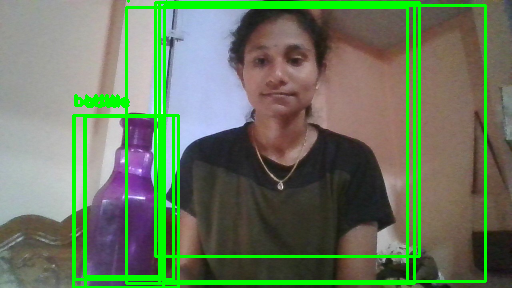

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load YOLOv3 model
net = cv2.dnn.readNetFromDarknet("/content/drive/MyDrive/sunandini/yolov3.cfg", "/content/drive/MyDrive/sunandini/yolov3 (2).weights")

# Load classes
classes = []
with open("/content/drive/MyDrive/sunandini/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Get output layer names
layer_names = net.getLayerNames()
output_layers = net.getUnconnectedOutLayersNames()

# Load image
img = cv2.imread("/content/WIN_20230325_08_18_44_Pro.jpg")

# Resize image
img = cv2.resize(img, None, fx=0.4, fy=0.4)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect objects
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Show detection results
conf_threshold = 0.5
nms_threshold = 0.4
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_threshold:
            center_x = int(detection[0] * img.shape[1])
            center_y = int(detection[1] * img.shape[0])
            width = int(detection[2] * img.shape[1])
            height = int(detection[3] * img.shape[0])
            left = int(center_x - width / 2)
            top = int(center_y - height / 2)
            cv2.rectangle(img, (left, top), (left + width, top + height), (0, 255, 0), 2)
            cv2.putText(img, classes[class_id], (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
